# Algerian Forest Fires

**Data Source**: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset  
The dataset includes 244 instances that regroup a data of two regions of Algeria.

In [1]:
col_names = ["day", "month", "year", "Temperature", "RH", "Ws", "Rain" , 
             "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes"]

## 1.Load dữ liệu

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('./5_forest_fire.csv',names=col_names)

##### Shape của dữ liệu

In [4]:
dataset.shape

(246, 14)

## 2.Kiểm tra dữ liệu

In [5]:
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
dataset.tail(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


## 2.1 Tổng quát mô tả

In [8]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


#### Nhìn tổng quát qua bản mô tả ta thấy có 246 cột ngày, nhưng các cột khác chỉ 245 => Có thể nói có một vài cột bị miss value
#### Có 33 ngày ( có trường hợp ngoại lệ ), có 5 tháng (Tập trung vào 1 số tháng có thể là mùa cháy rừng trong giai đoạn cao điểm), 
#### và diễn ra trong 2 năm
#### Ngày phổ biến là 01 xuất hiện 8 lần, số tháng diễn ra cao điểm là 07, năm xảy ra nhiều là 2012. Và các số liệu khác...
#### Nhiệt độ trung bình là bao nhiêu?

In [9]:
print(dataset['month'].unique())
print(dataset['day'].unique())
print(dataset['year'].unique())

['06' '07' '08' '09' nan 'month']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'Sidi-Bel Abbes Region Dataset' 'day']
['2012' nan 'year']


### Kết luận lại: Nhận thấy rằng có những hàng có giá trị khác số. (day, month, year)

###  2.2 Kiểm tra xem có bao nhiêu nhãn

In [10]:
dataset.groupby("Classes").count()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,,,,
Classes,1,1,1,1,1,1,1,1,1,1,1,1,1
fire,4,4,4,4,4,4,4,4,4,4,4,4,4
fire,2,2,2,2,2,2,2,2,2,2,2,2,2
fire,131,131,131,131,131,131,131,131,131,131,131,131,131
not fire,2,2,2,2,2,2,2,2,2,2,2,2,2
not fire,1,1,1,1,1,1,1,1,1,1,1,1,1
not fire,101,101,101,101,101,101,101,101,101,101,101,101,101
not fire,1,1,1,1,1,1,1,1,1,1,1,1,1
not fire,1,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
from matplotlib import pyplot as plt

### 2.3 Biểu đồ

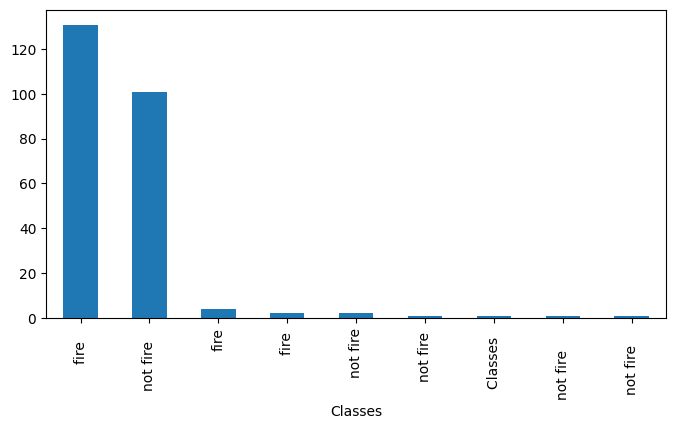

In [12]:
plt.figure(figsize=(8,4))
dataset["Classes"].value_counts().plot(kind='bar')
plt.show()

##### Nhìn vào dữ liệu ta thấy một trường hợp ngoại lệ khi có 2 nhãn chính là fire và not fire, tuy nhiên số dòng đang bị thừa. 

##### Có 131 vụ cháy và 101 không cháy

## 2.4 Xóa thừa dữ liệu

In [119]:
# Hàm kiểm tra xem hàng có ít giá trị lặp lại hay không
def filter_low_variance(row, threshold=5):
    # Đếm số lượng các giá trị duy nhất trong hàng
    unique_values = row.value_counts()
    
    # Nếu giá trị xuất hiện nhiều lần nhỏ hơn threshold thì loại bỏ hàng đó
    if unique_values.max() < threshold:
        return True
    return False


In [120]:
# Áp dụng lọc các hàng có ít giá trị lặp lại
dataset_cleaned = dataset[~dataset.apply(filter_low_variance, axis=1)]

# Hiển thị DataFrame đã loại bỏ các hàng không phù hợp
print(dataset_cleaned)


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, date]
Index: []


## 2.1.1 Kiểm tra dữ liệu bị miss value

In [13]:
import numpy as np
dataset.isna().sum().sum()

14

### Hiển thị những giá trị bị miss

In [14]:
dataset.isna().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

##### Kết luận nhỏ miss 14 giá trị

## 2.5 Data cleaning

In [15]:
dataset[dataset.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### Nhận xét Ta nhận thấy từ chỉ mục thứ 122 sẽ là một vùng khác mang tên Sidi-Bel

## 2.6 Thêm column Region bắt đầu chỉ mục 122

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [16]:
dataset.loc[:122,"Region"] = 0
dataset.loc[122:,"Region"] = 1

## 2.7 Khắc phục lỗi khi type là object không vẽ được biểu đồ thông kê

In [18]:
print(dataset.dtypes)

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object


In [19]:
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [20]:
dataset[['Region']] = dataset[['Region']].astype(int)

### Drop dữ liệu null

In [21]:
## Removing the null values
dataset=dataset.dropna().reset_index(drop=True)


In [22]:
dataset.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## Check dữ liệu

In [23]:
dataset.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0


In [24]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [25]:
dataset.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [30]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
dataset[['month','day','year','Temperature','RH','Ws']]=dataset[['month','day','year',]].astype(int)

ValueError: invalid literal for int() with base 10: 'month'

In [36]:
# Danh sách các cột cần chuyển đổi sang dạng số float
columns_to_convert = ['Temperature','RH','Ws','Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for col in columns_to_convert:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
    


## 2.8 Plot 

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

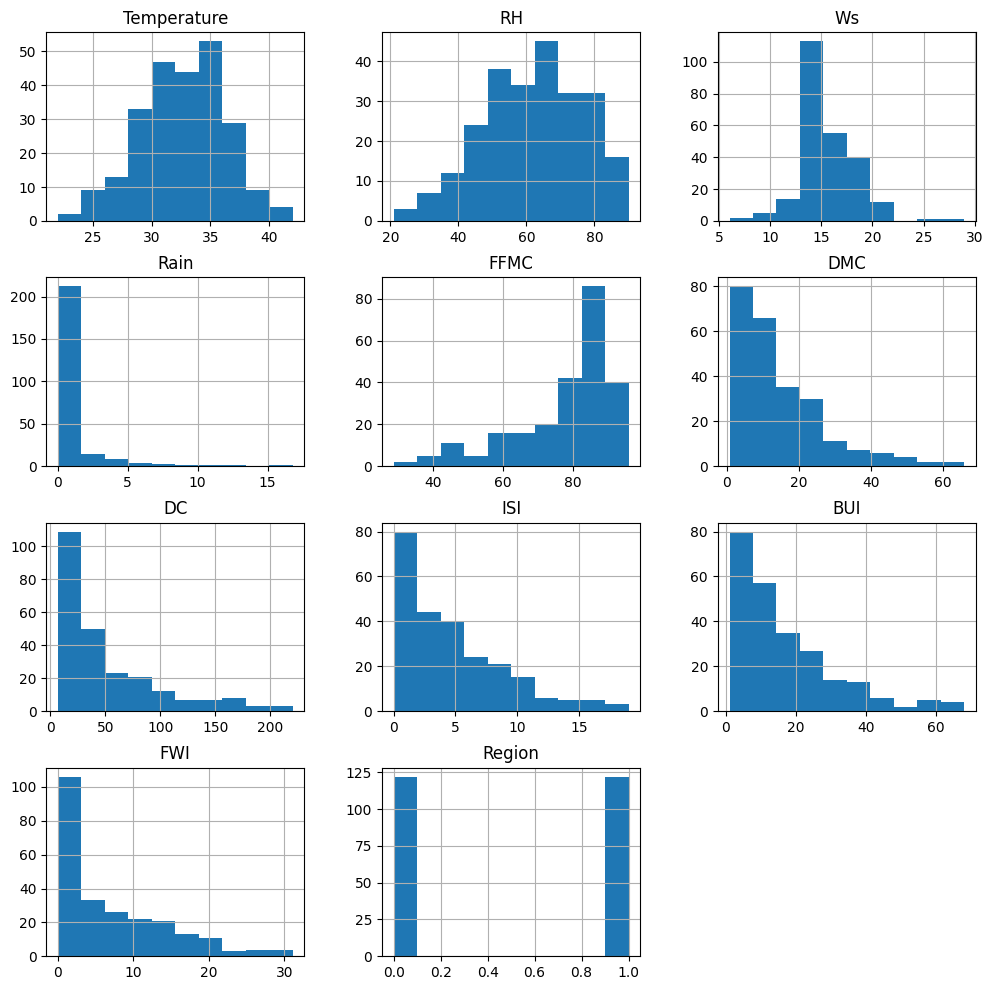

In [38]:
dataset.hist(figsize = (12, 12))

In [104]:
num_data = dataset.columns.to_list()

### Xem dữ liệu đếm từng lớp có trong 

# 2.9 Xem lượng mưa

In [40]:
dataset['date'] = pd.to_datetime(dataset[['day', 'month', 'year']].astype(str).agg('-'.join, axis=1), format='%d-%m-%Y', errors='coerce')
print(dataset[['day', 'month', 'year', 'date']].head())


  day month  year       date
0  01    06  2012 2012-06-01
1  02    06  2012 2012-06-02
2  03    06  2012 2012-06-03
3  04    06  2012 2012-06-04
4  05    06  2012 2012-06-05


### Tổng lượng mưa theo ngày

In [41]:
# Tính tổng lượng mưa theo ngày
rain_by_day = dataset.groupby('date')['Rain'].sum()

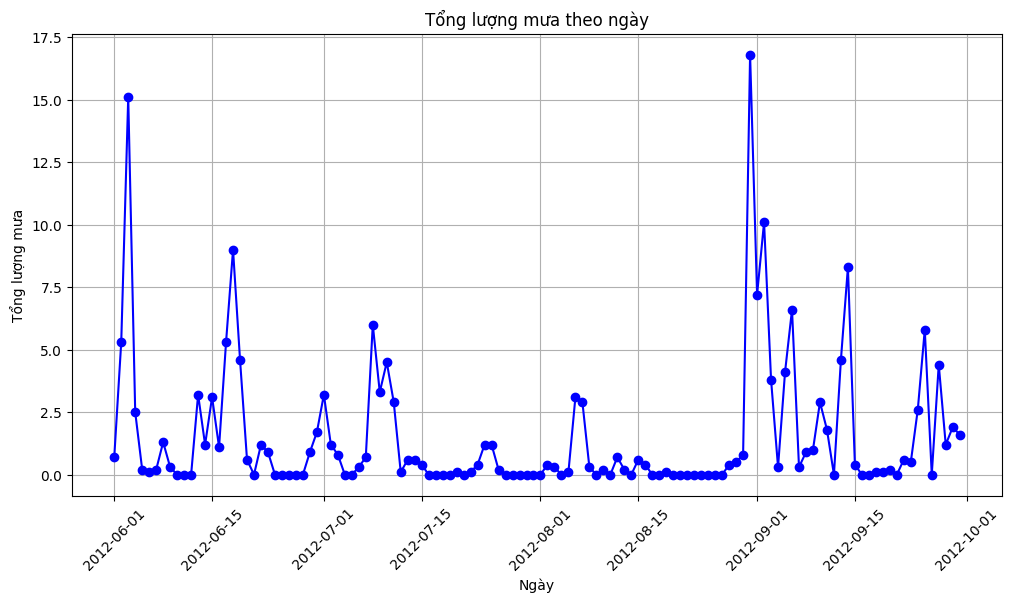

In [42]:
# Vẽ biểu đồ tổng lượng mưa theo ngày
plt.figure(figsize=(12, 6))
plt.plot(rain_by_day.index, rain_by_day.values, marker='o', linestyle='-', color='b')
plt.title('Tổng lượng mưa theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng lượng mưa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tổng lượng mưa theo tháng

In [43]:
rain_by_month = dataset.resample('M', on='date')['Rain'].sum()

C:\Users\NguyenThanh\AppData\Local\Temp\ipykernel_17608\308980738.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rain_by_month = dataset.resample('M', on='date')['Rain'].sum()


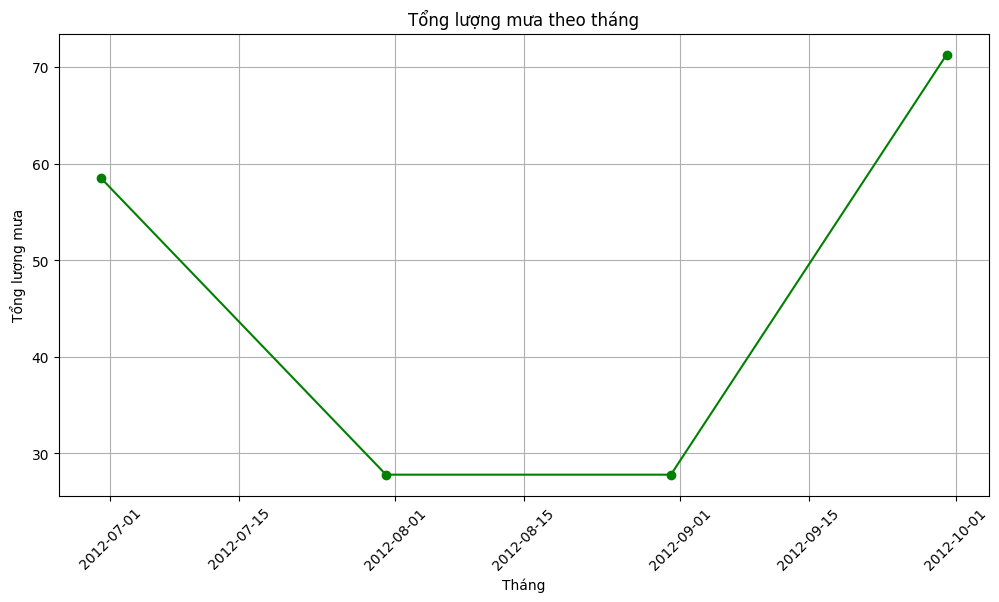

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(rain_by_month.index, rain_by_month.values, marker='o', linestyle='-', color='g')
plt.title('Tổng lượng mưa theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng lượng mưa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Kết luận: Lượng mua tập trung vào nửa cuối tháng 9 đến đầu tháng 10 là đỉnh điểm

## Thống kê những ngày, tháng ít xảy ra cháy

In [110]:
print(dataset['Classes'].unique())

non_fire_days = dataset[dataset['Classes'] == 'not fire']

non_fire_days_grouped = non_fire_days.groupby(['year', 'month', 'day'])[['date']].first()

print("Những ngày không có vụ cháy:")
print(non_fire_days_grouped)


['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ' nan
 'Classes  ' 'not fire     ' 'not fire    ']
Những ngày không có vụ cháy:
                     date
year month day           
2012 08    31  2012-08-31
     09    02  2012-09-02


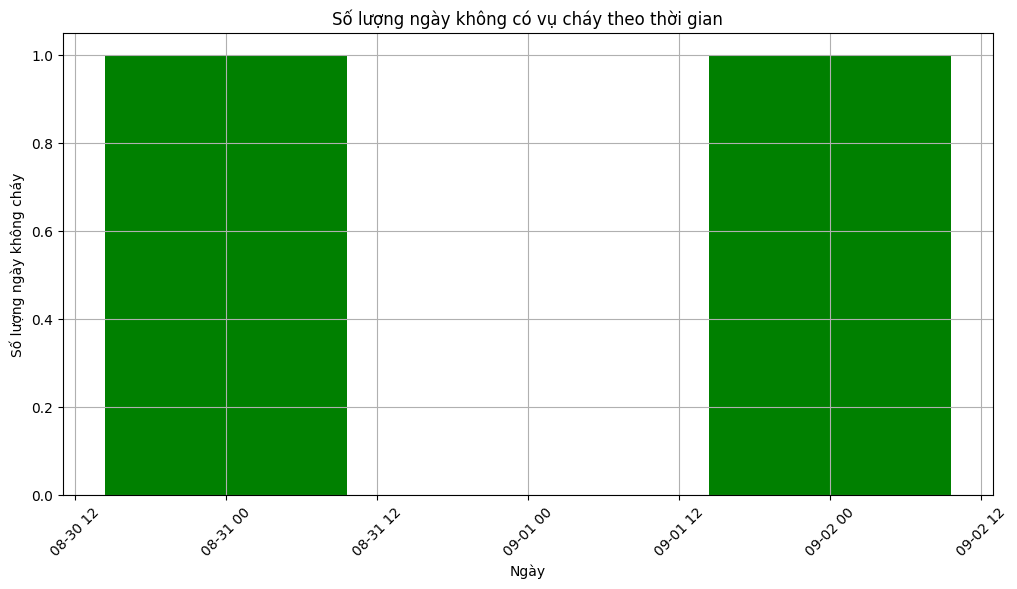

In [111]:

import matplotlib.pyplot as plt

# Vẽ biểu đồ số lượng ngày không cháy
plt.figure(figsize=(12, 6))
plt.bar(non_fire_days['date'].value_counts().index, non_fire_days['date'].value_counts().values, color='green')
plt.title('Số lượng ngày không có vụ cháy theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số lượng ngày không cháy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ' 'Classes  '
 'not fire     ' 'not fire    ']


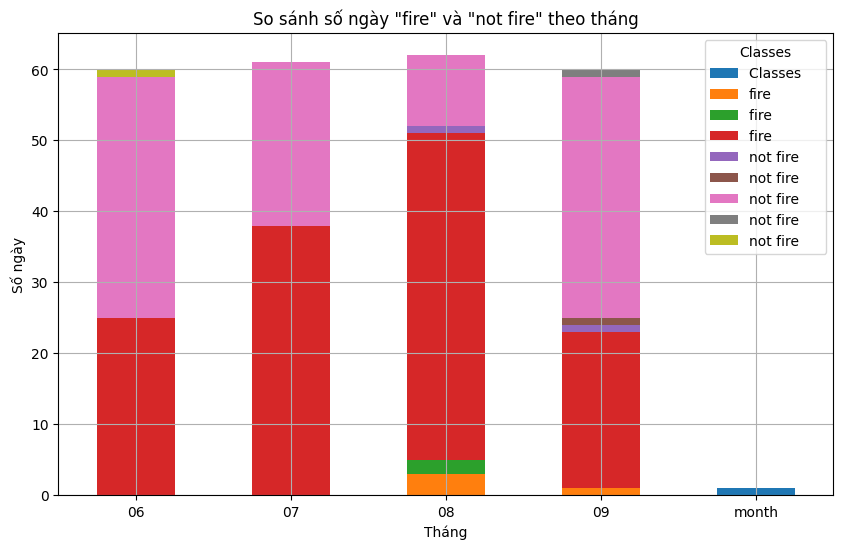

In [46]:
import matplotlib.pyplot as plt

# Kiểm tra các giá trị trong cột 'Classes'
print(dataset['Classes'].unique())

# Tổng hợp số lượng ngày có 'fire' và 'not fire' theo tháng
fire_counts = dataset.groupby(['month', 'Classes']).size().unstack(fill_value=0)

# Vẽ biểu đồ so sánh số ngày 'fire' và 'not fire' theo tháng
fire_counts.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('So sánh số ngày "fire" và "not fire" theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số ngày')
plt.xticks(rotation=0)
plt.legend(title='Classes')
plt.grid(True)
plt.show()


In [49]:
import seaborn as sns
%matplotlib inline

In [61]:
## drop day,month and year
df_copy=dataset.drop(['day','month','year'],axis=1)

In [63]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

In [64]:
print(percentage)

Classes
fire             53.688525
not fire         41.393443
fire              1.639344
fire              0.819672
not fire          0.819672
not fire          0.409836
Classes           0.409836
not fire          0.409836
not fire          0.409836
Name: proportion, dtype: float64


### Vì thời gian có hạn nên em làm đến đây.
### Hướng tiếp theo em đánh giá mức độ tương quan của dữ liệu.
### Chọn model phù hợp như Kmean, K hàng xóm,...

## 2.10 Tương quan

#### Đang lỗi vì chưa convert dữ liệu từ column class sang dạng 0 1

In [65]:
df_copy.corr()

ValueError: could not convert string to float: 'not fire   '

## 3. Chia dữ liệu thành các tập Train, Val, Test

## 4. Mô hình

## 5. Đánh giá mô hình